In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import warnings
# Dependency imports
from absl import flags
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy as np
import pickle 
warnings.simplefilter(action="ignore")
import statistics
from preprocessplot import accuracies, losses
from plots import tsplotseveralacc, tsplotseveralloss

In [2]:
losses = 'optimizer_results/cifar10_resnet_random_transform/resnet/'
with open (losses+'result_adagrad_b128/Decay_True_lr0.01_no1_b128_m0.9_adagrad', 'rb') as fp:
    adagrad = pickle.load(fp)
with open (losses+'result_adabound_b128/Decay_True_lr0.005_no1_b128_m0.9_adabound', 'rb') as fp:
    adabound = pickle.load(fp)
with open (losses+'result_adam_b128/Decay_True_lr0.005_no1_b128_m0.9_adam', 'rb') as fp:
    adam = pickle.load(fp)
with open (losses+'result_padam_b128/Decay_True_lr0.5_no1_b128_m0.9_padam', 'rb') as fp:
    padam = pickle.load(fp)
with open (losses+'result_rmsprop_b128/Decay_True_lr0.009_no1_b128_m0.9_rmsprop', 'rb') as fp:
    rmsprop = pickle.load(fp)
with open (losses+'result_sgd_b128/Decay_True_lr0.01_no1_b128_m0.0_sgd', 'rb') as fp:
    sgd = pickle.load(fp)
with open (losses+'result_sagd_b128/Decay_True_lr0.01_no0.01_b128_m0.9_sagd', 'rb') as fp:
    sagd = pickle.load(fp)

# TEST ACCURACIES

In [3]:
adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2 = accuracies(adagrad, adabound, adam, padam, rmsprop, sgd, sagd)

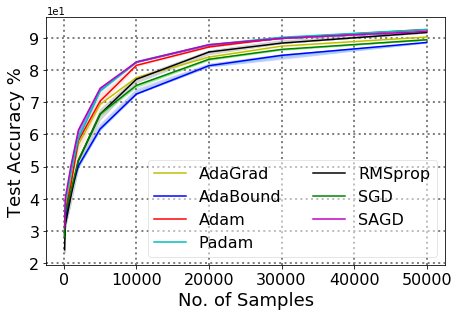

In [4]:
iterations = len(adagradacc2[0])
itera = [100, 200, 1000,2000, 5000, 10000, 20000,30000, 50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (6.5, 4.5)
leg_fontsize= 16
axis_fontsize = 18
toplot = [adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2]
tsplotseveralacc(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

# TEST LOSSES

In [5]:
adagradloss = adagrad['test_loss']
adaboundloss = adabound['test_loss']
adamloss = adam['test_loss']
padamloss = padam['test_loss']
rmsproploss = rmsprop['test_loss']
sgdloss = sgd['test_loss']
sagdloss = sagd['test_loss']
def losses(adagradloss, adaboundloss, adamloss, padamloss, rmsproploss, sgdloss, sagdloss):
  list_mins = []
  for element in sagdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sagdloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adagradloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adagradloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adaboundloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adaboundloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in padamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  padamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in rmsproploss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  rmsproploss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in sgdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sgdloss2 = list(map(list, zip(*list_mins)))
  return adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2

In [6]:
adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2 = losses(adagradloss, adaboundloss, adamloss, padamloss, rmsproploss, sgdloss, sagdloss)

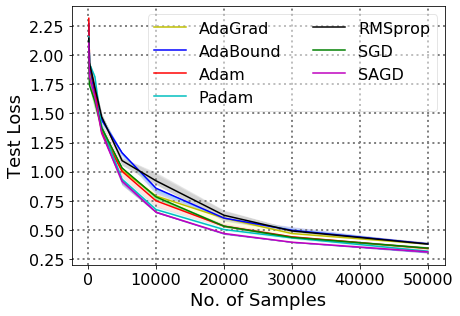

In [7]:
iterations = len(adagradloss2[0])
itera = [100, 200, 1000,2000, 5000, 10000, 20000,30000, 50000]
figsize = (6.5, 4.5)
leg_fontsize= 16
axis_fontsize = 18
toplot = [adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2]
tsplotseveralloss(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')